<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-categorical-regression-(equivalent-of-One-way-ANOVA)" data-toc-modified-id="Bayesian-estimation-categorical-regression-(equivalent-of-One-way-ANOVA)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation categorical regression (equivalent of One-way ANOVA)</a></span></li><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bayesian inference</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-overview-and-study-description" data-toc-modified-id="Data-overview-and-study-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data overview and study description</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Import data</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plotting-histograms-for-the-data-depednent-variable-of--the-number-of-intrusive-thoughts" data-toc-modified-id="Plotting-histograms-for-the-data-depednent-variable-of--the-number-of-intrusive-thoughts-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Plotting histograms for the data depednent variable of  the number of intrusive thoughts</a></span></li></ul></li></ul></li><li><span><a href="#Treament-coding" data-toc-modified-id="Treament-coding-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Treament coding</a></span></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-simple-regression" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-simple-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian simple regression</a></span><ul class="toc-item"><li><span><a href="#Posterior-distributions-plots" data-toc-modified-id="Posterior-distributions-plots-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Posterior distributions plots</a></span></li><li><span><a href="#Posterior-autocorrelation-plot" data-toc-modified-id="Posterior-autocorrelation-plot-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Posterior autocorrelation plot</a></span></li><li><span><a href="#Posterior-trace-plots" data-toc-modified-id="Posterior-trace-plots-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Posterior trace plots</a></span></li></ul></li><li><span><a href="#Posterior-predcitive-check" data-toc-modified-id="Posterior-predcitive-check-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Posterior predcitive check</a></span></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-categorical-regression" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-categorical-regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Reporting the results of the Bayesian categorical regression</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [2]:
# Import relevant packages for analysis
import pystan as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix, dmatrices
from patsy.contrasts import Treatment, Sum
import arviz as az

In [72]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation categorical regression (equivalent of One-way ANOVA)

# Bayesian inference
<font size = "3"> Following the quick description of the classic one sample t-test above its important to keep in mind that Bayesian analysis inference are all derived from the applciation of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to the Z-test, it is fundamentally different, becuase it uses fully probabilistic modelling and the infernce is not based on sampling distributions</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. In the case of scientific research publication is the goal, as such the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predcitve checks to acsetain os the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interprete and the posterior

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for question under investigation
## Data overview and study description

The data and the analysis has been taken from https://sites.trinity.edu/osl/data-sets-and-activities/one-way-anova-activities, with the oringla dataset being from James et al. (2015).

See orignal paper here https://journals.sagepub.com/doi/pdf/10.1177/0956797615583071?referrer=&priority=true&module=meter-Links&pgtype=Blogs&contentId=&action=click&contentCollection=meter-links-click&version=meter+at+null&mediaId=

A reality of trauma is that indivudals can experience flasbacks which have been termed "Intrusive memories". A form of treatment that has been argued to be effective for suffers of intrusive memories is to use reconsolidtion methods. As such, James et al. (2015) wanted to inestigate if a video game treament (tetris code improve the number of intrusive meories nd indivduak experienced.

The partipants with the study were split into four codntions (n=72, with 18 per condition).

1. No-task control: These participants completed a 10-minute music filler task.
2. Reactivation + Tetris: These partipants underwent a reactivation task to (trama film) to reactivate teir traumati memories, ehich was then followe dby 10 minute filler music task. this was follwoed by playing tetris for 12 minutes
3. Tetris: this group played tetris for 12 minutes
4. Reactivtion only: Partipats only watch the trauma film

## Import data

In [26]:
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/Data/James%20et%20al%202015%20Experiment%202%20Data%20Set.csv"

#Generare apndas data frame with the study data
df = pd.read_csv(url)
df.head(1)

,Condition,Time_of_Day,BDI_II,STAI_T,pre_film_VAS_Sad,pre_film_VAS_Hopeless,pre_film_VAS_Depressed,pre_film_VAS_Fear,pre_film_VAS_Horror,pre_film_VAS_Anxious,...,Day_Zero_Number_of_Intrusions,Days_One_to_Seven_Number_of_Intrusions,Visual_Recognition_Memory_Test,Verbal_Recognition_Memory_Test,Number_of_Provocation_Task_Intrusions,Diary_Compliance,IES_R_Intrusion_subscale,Tetris_Total_Score,Self_Rated_Tetris_Performance,Tetris_Demand_Rating
0,1,2,1,33,0.0,0.0,0.0,0.4,0.3,0.8,...,2,4,15,18,5,9,0.62,9999,9999.0,0


# Exploratory data analysis 
### Plotting histograms for the data depednent variable of  the number of intrusive thoughts

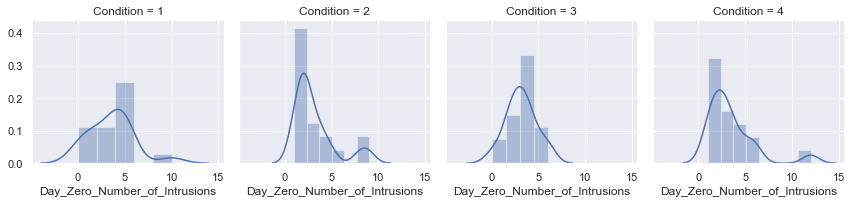

In [3]:
#Set them of seaborn plots for nicer display (not APA, work that one out soon)
sns.set()

#Genrate grd to dspaly th four separate condtions
g= sns.FacetGrid(df, col="Condition")

#Generate the four hisogram plots for the 4 condtions
g.map(sns.distplot, "Day_Zero_Number_of_Intrusions")

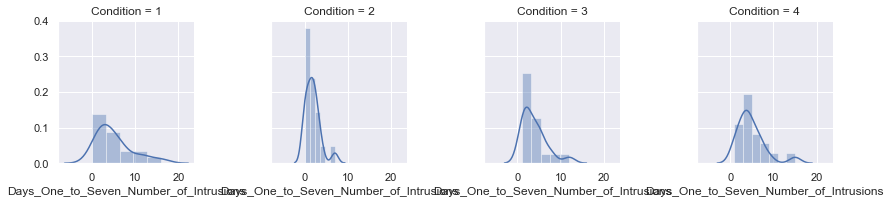

In [4]:
g= sns.FacetGrid(df, col="Condition")
g.map(sns.distplot,  "Days_One_to_Seven_Number_of_Intrusions")

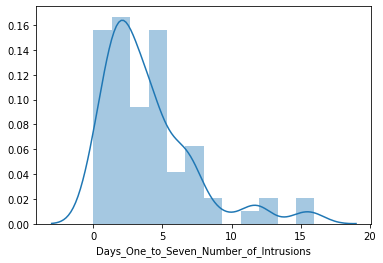

In [71]:
sns.distplot(df["Days_One_to_Seven_Number_of_Intrusions"]);

# Treament coding 
 Generating a design (contrast) matrix for categorical regression 
 analysis with treatment coding

In [67]:
df.Condition = df.Condition.astype("category")
df.Condition = df['Condition'].cat.reorder_categories([2, 1,3,4])
Reordered =  dmatrix("Condition", df)
Reordered = np.array(Reordered)

In [52]:
One_wayANOVA = """
data{
int<lower=0> N; // Number of rows in the contrast matix
int<lower=0> K; // Number columns
vector[N] y; // Dependent variable data points
matrix[N,K] x; //Contrast matrix
}

parameters{

// Beta coefficients
vector[K] beta; 
// Pooled sigma estimate
real<lower=0> sigma;

}
model{

//likelihood
y ~ normal(x * beta  , sigma);

}

generated quantities {

real yrep[N];
yrep = normal_rng(x * beta, sigma);

}

"""

In [53]:
sm = ps.StanModel(model_code = One_wayANOVA)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ef5cc59eef1be6fe800180e9cf7fe3d0 NOW.


In [54]:
#Generate python dictionary for passing the relevant data for the analysis to stan
data = {'N': len(df),
        'K': Reordered.shape[1],
        'y': df["Days_One_to_Seven_Number_of_Intrusions"].values,
        'x': Reordered}

In [57]:
fit = sm.sampling(data = data, iter = 10000, chains=4, seed= 302675)

In [58]:
# Because of python pritn stament it is easier to extract the resut sint a panda data frame for data expression
summary = fit.summary()
fit_df = pd.DataFrame(summary['summary'], 
                  columns = summary['summary_colnames'], 
                  index = summary['summary_rownames'])

In [59]:
fit_df.head()

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta[1],1.886534,0.009165,0.763084,0.393339,1.374543,1.884467,2.402127,3.372332,6932.072378,1.000122
beta[2],3.215328,0.011542,1.077534,1.119518,2.479381,3.223778,3.931091,5.335480,8714.987677,0.999992
beta[3],2.003769,0.011888,1.079119,-0.145579,1.290500,1.998876,2.714139,4.097283,8240.375511,1.000013
beta[4],2.953986,0.011509,1.081558,0.811282,2.225091,2.959985,3.679621,5.068720,8831.047479,1.000091
sigma,3.236815,0.002376,0.280444,2.744055,3.039608,3.216995,3.416494,3.838365,13936.345422,1.000110


# Post model fit-visualisations - Bayesian simple regression

## Posterior distributions plots

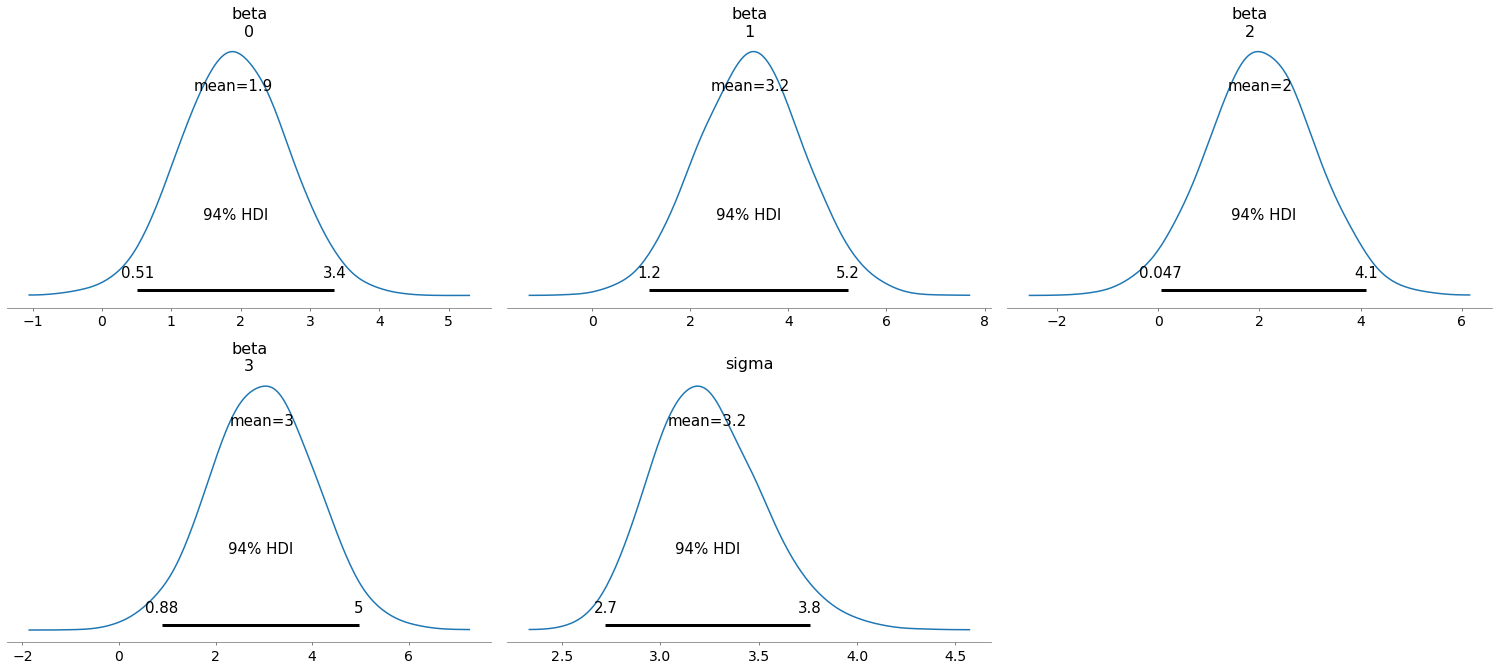

In [60]:
# Posterior plots showing the defaults 94% Credible interval of the arviz package
az.plot_posterior(fit, var_names=("beta", "sigma"));

## Posterior autocorrelation plot

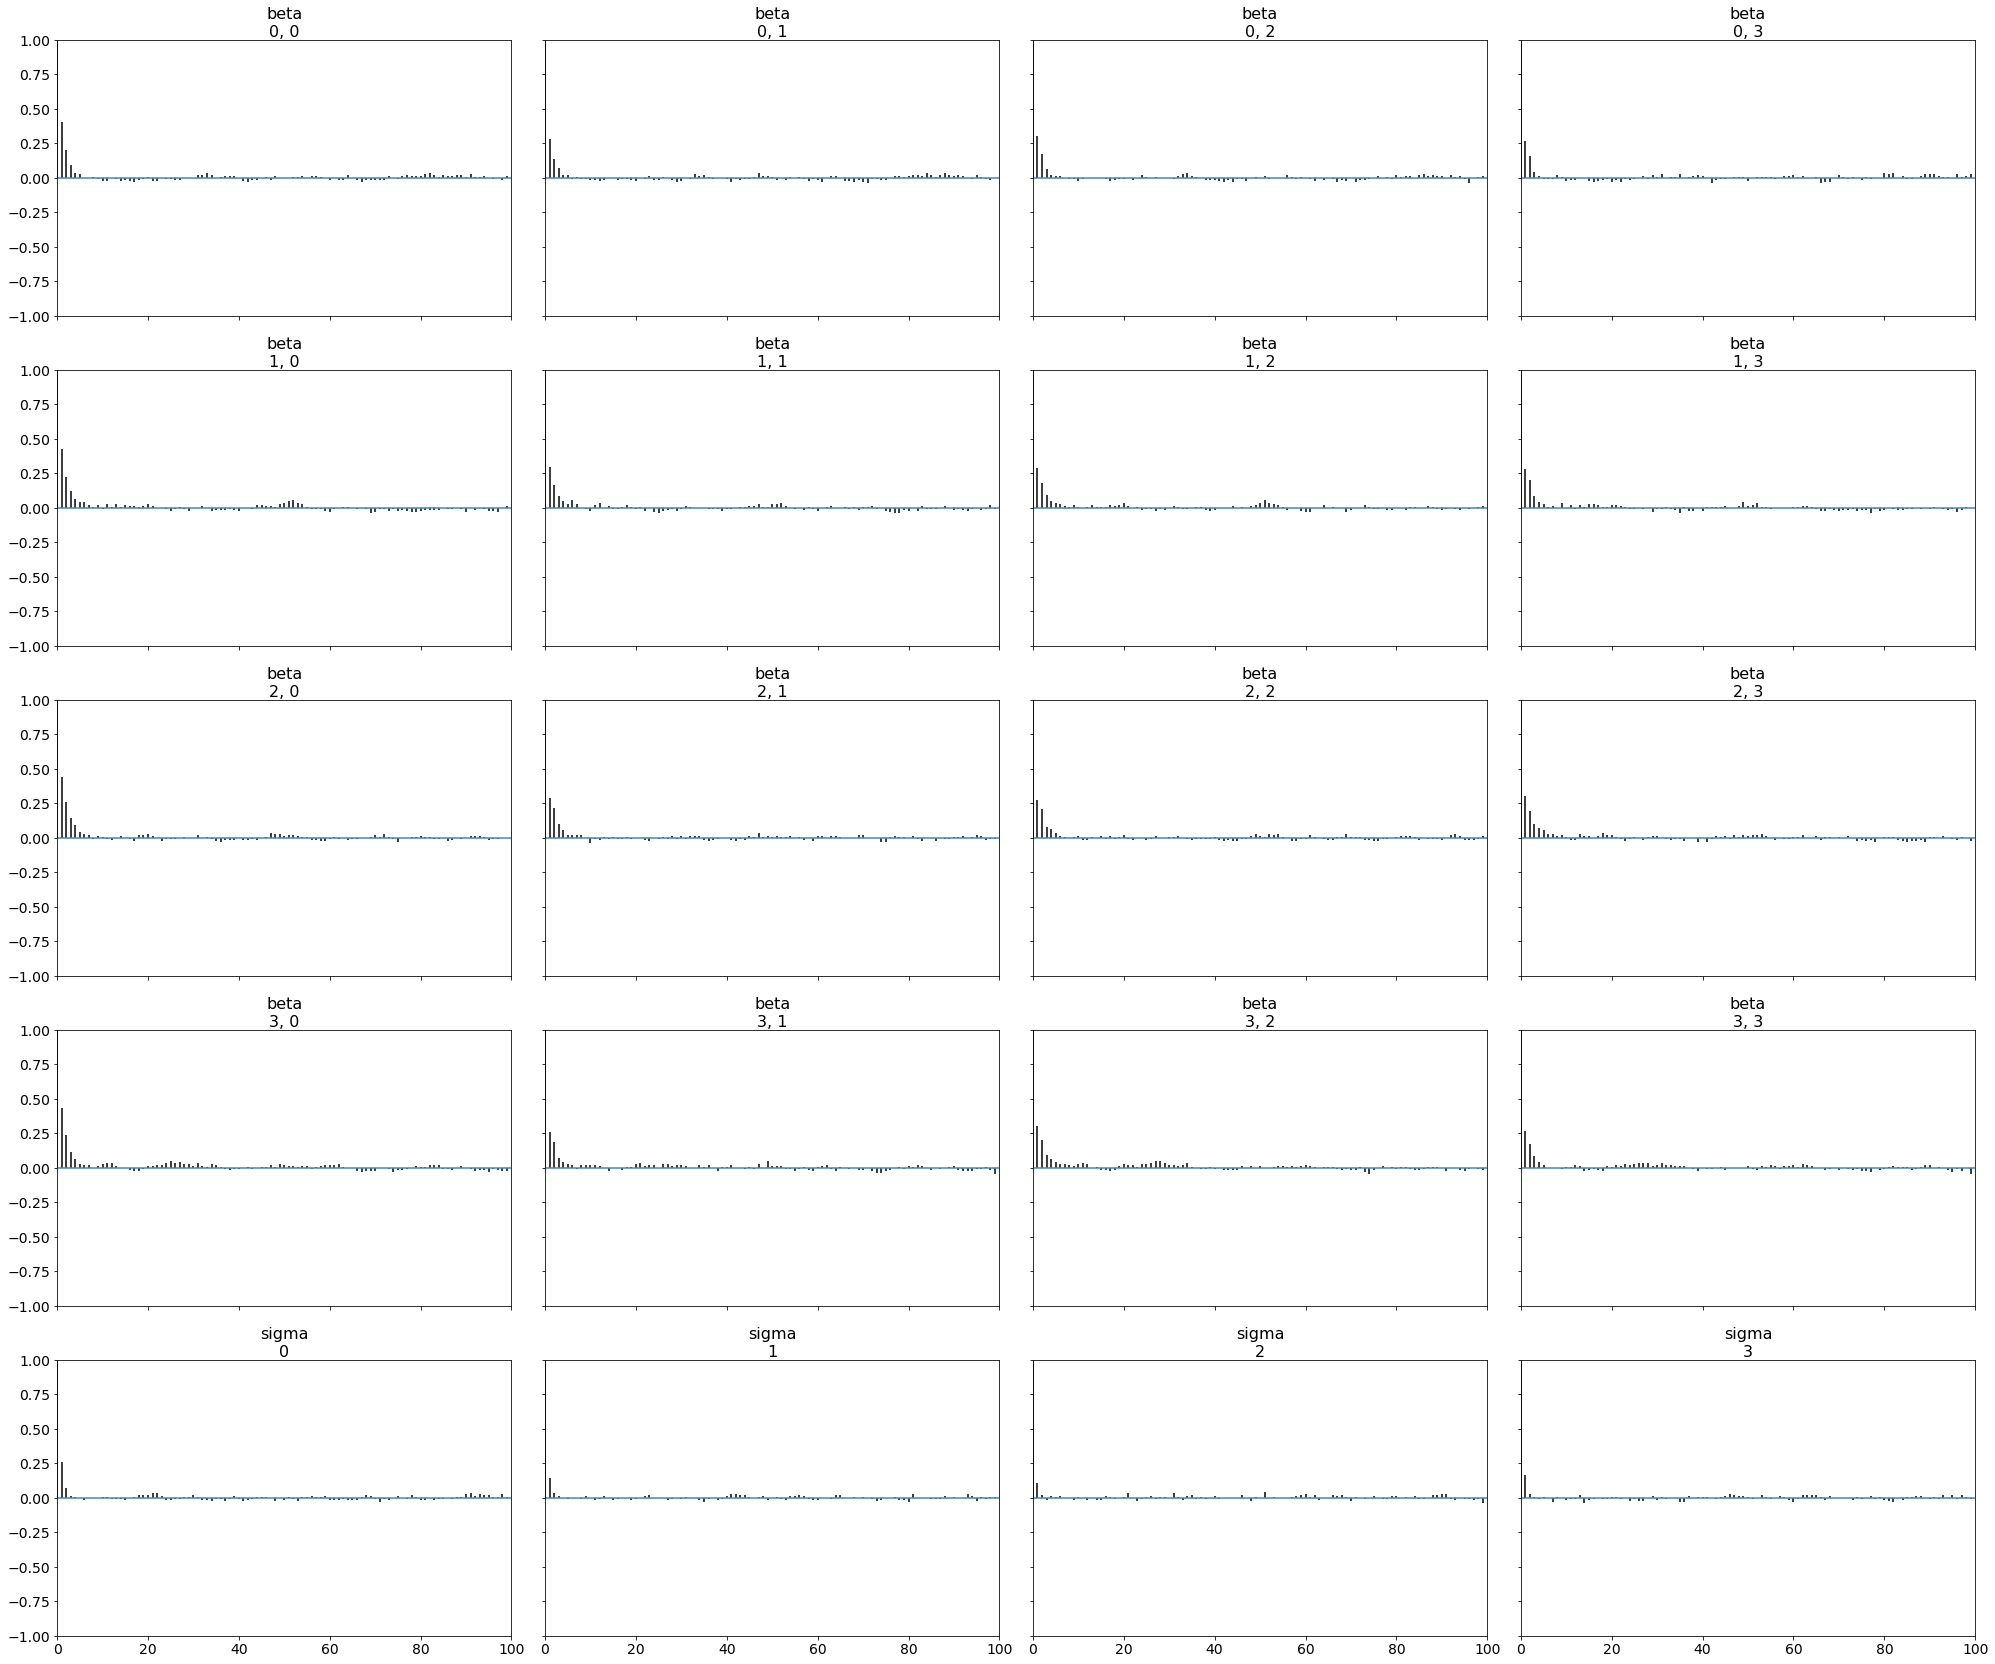

In [61]:
# Using the arviz package the autocorrelation of the 4 MCMC chains can be plotted.
az.plot_autocorr(fit,  var_names=("beta", "sigma"));

## Posterior trace plots 

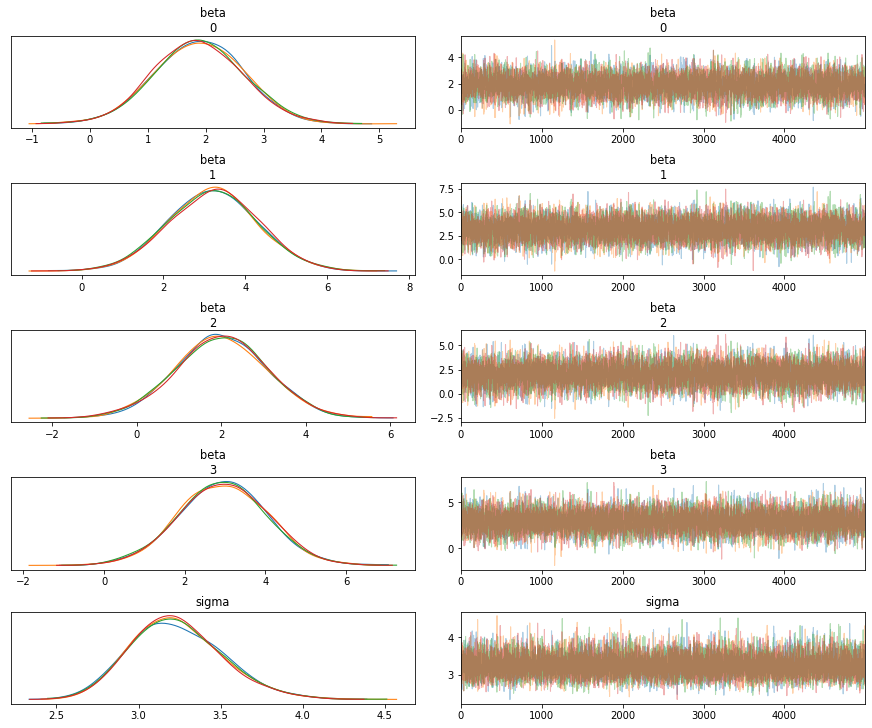

In [69]:
az.plot_trace(fit, var_names=("beta", "sigma"));

# Posterior predcitive check 

In [62]:
#Convert pystan fit object to IO for Arviz functions.
data = az.from_pystan(
                posterior=fit,
                posterior_predictive='yrep',
                observed_data=["y"])

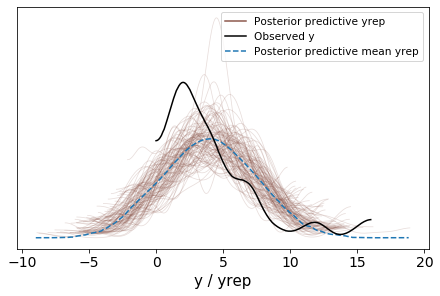

In [63]:
# Plot posterior simulated data sets for posterior predictive check
az.plot_ppc(data, data_pairs = {"y" : "yrep"}, num_pp_samples= 100);

# Reporting the results of the Bayesian categorical regression

<font size = "3">As Kruscke correctly points out there is not standard formula or presentation method for reuslts in journal article like the APA guide for reporting frequentist analysis. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) argue visualisations maybe even more key so the all the visualtions above would have to be included with any write up. Anyway below the write up as below general follows the advice of Kruscke (2015) chapter 25. In any application though it comes down to the problem to be described an the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>

# References 
    
Hays, W.L. (1973) Statistics for the social sciences. Winston New York: Holt, Rinehart.
    
James, E. L., Bonsall, M. B., Hoppitt, L., Tunbridge, E. M., Geddes, J. R., Milton, A. L., & Holmes, E. A. (2015). Computer game play reduces intrusive memories of experimental trauma via reconsolidation-update mechanisms. Psychological Science, 26, 1201-1215.